In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from scipy import stats
%matplotlib inline

## import data 


[Cars dataset](https://www.kaggle.com/osmi/mental-health-in-tech-survey?select=survey.csv)

In [2]:
df = pd.read_csv("USA_cars_datasets.csv", index_col=0)

In [3]:
print('shape of the data set ', df.shape)
df.head()


shape of the data set  (2499, 12)


,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [4]:
df.columns

Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color',
       'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

In [5]:
df.dtypes

price            int64
brand           object
model           object
year             int64
title_status    object
mileage          int64
color           object
vin             object
lot              int64
state           object
country         object
condition       object
dtype: object

## Feature engineering /clean the data set


In [6]:
#For 'condition', I notice that there are different ways time is measured, which is why there are several dummy variables for time. 
#This might involve standardizing the time
#or using a scaler.
#change listing expired to 0 and convert to the same unit
#make a column with just the numbers. 
#if the next letter is the letter d in the column , multiply by __ to get common unit. 

df['condition'].unique()

array(['10 days left', '6 days left', '2 days left', '22 hours left',
       '20 hours left', '19 hours left', '3 days left', '21 hours left',
       '17 hours left', '2 hours left', '3 hours left', '34 minutes',
       '16 hours left', '18 hours left', '1 days left', '32 minutes',
       '14 hours left', '5 hours left', '4 days left', '9 days left',
       '23 hours left', '8 days left', '7 days left', '5 days left',
       '9 minutes', '1 minutes', '7 hours left', '16 minutes',
       '6 hours left', '1 hours left', 'Listing Expired', '13 days left',
       '24 hours left', '15 hours left', '53 minutes', '27 minutes',
       '12 days left', '15 days left', '30 minutes', '29 minutes',
       '28 minutes', '48 minutes', '11 days left', '4 hours left',
       '47 minutes', '12 hours left', '36 minutes'], dtype=object)

In [7]:
#make a new column that only has the number part of the condition column so the algorithm can use it. 

df['condition_number'] = df['condition'].str[0:2]

In [8]:
#replace Li (from listing expired) with 0
#df['condition_number'].replace('Li', '0')
#df['condition_number'].value_counts()
df['condition_number'] = df['condition_number'].replace({'Li':'0'})
df['condition_number'] = pd.to_numeric(df.condition_number, errors='coerce')


In [9]:
#Depending on what unit is listed in the condition column, we will take the number before it and multiply it by a factor
#to convert all numbers to minutes.
#Index into all possible condition unit types by selected what's in the 2-5th position. 
df['condition'].str[2:5].value_counts()

day    1317
 ho     963
 da      78
hou      67
 mi      36
sti      20
min      18
Name: condition, dtype: int64

if 'condition' == 'ays' | 'day':
    multiply condition number by 1440 
    if 'condition' == 'hour' | 'our:
    multiply 'condition_number' 60
    else [do nothing for minutes and linstings]
    

    

In [10]:
#select units with days ('ays' or 'day' due to spacing) and multiply the respective condition number by 1440.
#1440 minutes in a day. 
df.loc[(df['condition'].str.replace(" ","").str[2:5] == 'ays' )| (df['condition'].str.replace(" ","").str[2:5] == 'day'), 'condition_number'] = df['condition_number'] * 1440


In [11]:
#Do the same with hour (in the form of 'hou' or 'our')
df.loc[(df['condition'].str.replace(" ","").str[2:5] == 'hou' )| (df['condition'].str.replace(" ","").str[2:5] == 'our'), 'condition_number'] = df['condition_number'] * 60


In [12]:
#Here I am assigning all categorical variables as dummy variables for better analysis.

In [13]:
#dummy variables for brands 
dummy = pd.get_dummies(df['brand'])
dummy = pd.get_dummies(df['brand'], drop_first=True)
dummy.head()

,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,ford,gmc,harley-davidson,...,land,lexus,lincoln,maserati,mazda,mercedes-benz,nissan,peterbilt,ram,toyota
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
dummycolor = pd.get_dummies(df['color'],drop_first = True)

In [15]:
dummymodel= pd.get_dummies(df['model'],drop_first = True)

I'm dropping vin because vin is just an identifier made of random letter and numbers. Each car has its own unique vin number, so it would be very difficult to see a correlation in price using vin numbers.

In [16]:
dummytitle = pd.get_dummies(df['title_status'],drop_first = True)
#state, country, and condition
dummy_state = pd.get_dummies(df['state'],drop_first = True)
dummy_country = pd.get_dummies(df['country'],drop_first = True)


In [17]:
#I am contcatenating the new columns of dummy variables to the original dataframe. 

new_df = pd.concat([df, dummytitle, dummy, dummycolor, dummymodel, dummy_state, dummy_country],axis=1)
new_df.drop('vin', axis = 1, inplace = True)
new_df.columns


Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color',
       'lot', 'state', 'country',
       ...
       'tennessee', 'texas', 'utah', 'vermont', 'virginia', 'washington',
       'west virginia', 'wisconsin', 'wyoming', ' usa'],
      dtype='object', length=258)

In [18]:
# There are over 250 columns in this data set. We want to minimize the number of columns for better (and faster) data 
#processing. To do this, we will initiate label encoding for all categorical columns.
list(df.loc[:, df.dtypes == object])

['brand',
 'model',
 'title_status',
 'color',
 'vin',
 'state',
 'country',
 'condition']

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [58]:
#print out the encoded items 
data = MultiColumnLabelEncoder(columns = ['brand','model', 'state', 'title_status', 'color', 'country']).fit_transform(df)
data.shape



(2499, 13)

In [59]:
#we now have only 13 columns vs 258.

## Analysis 

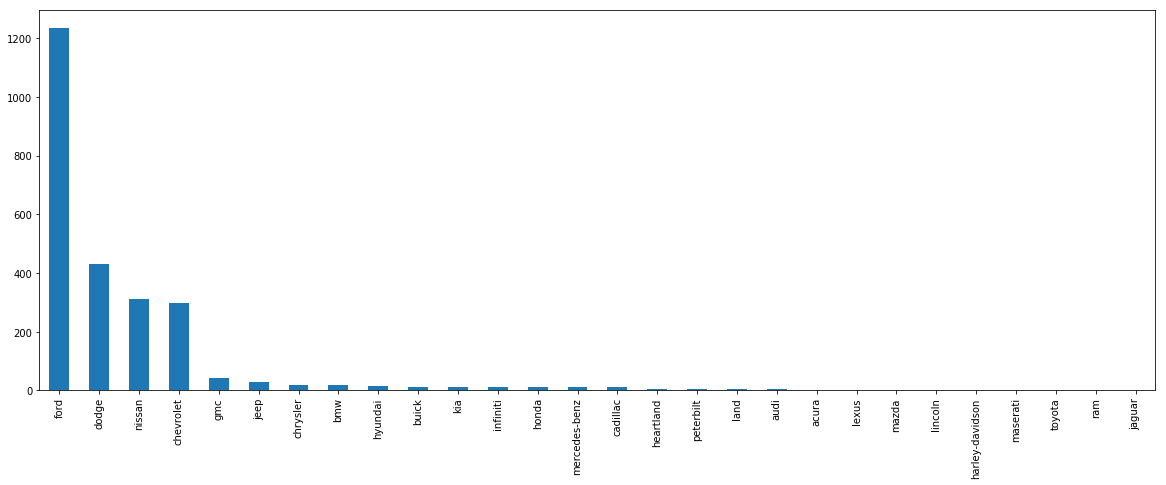

In [60]:


plt.figure(figsize=[20,7])

df['brand'].value_counts().plot(kind="bar")

plt.show()





Top cars are Ford, Dodge, Chevrolet and Nissan.  
These cars have at least 200 units sold.
Audi, Peterbilt, Acura, Lincoln, and other cars hav eless than 50 units.  

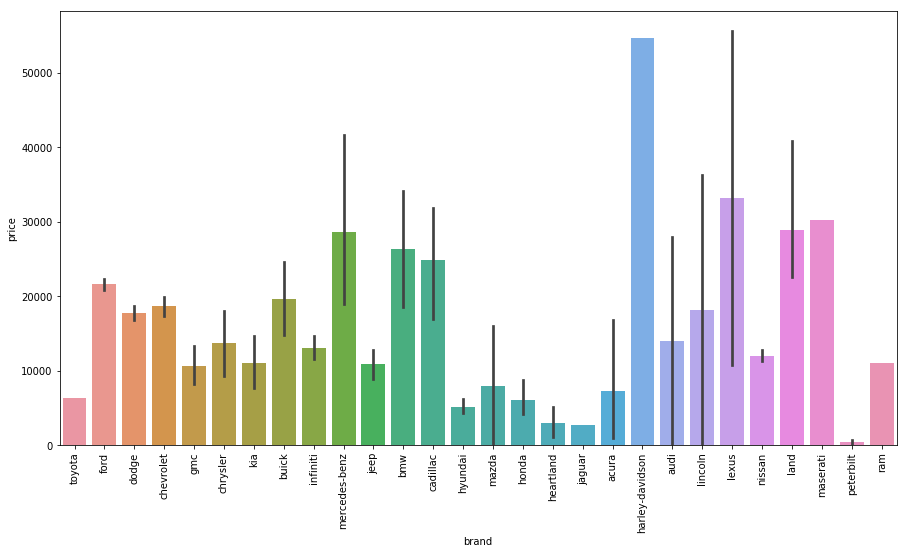

In [61]:
plt.figure(figsize=[15,8])
sns.barplot(x=df['brand'],  y =df['price'])
plt.xticks(rotation=90)
plt.show()

The most expensive brands in this dataset include Harley-Davidson, Lincoln, and Maserati.  
The least expensive cars appear to be Peterbult, Jaguar, and Heartland. 

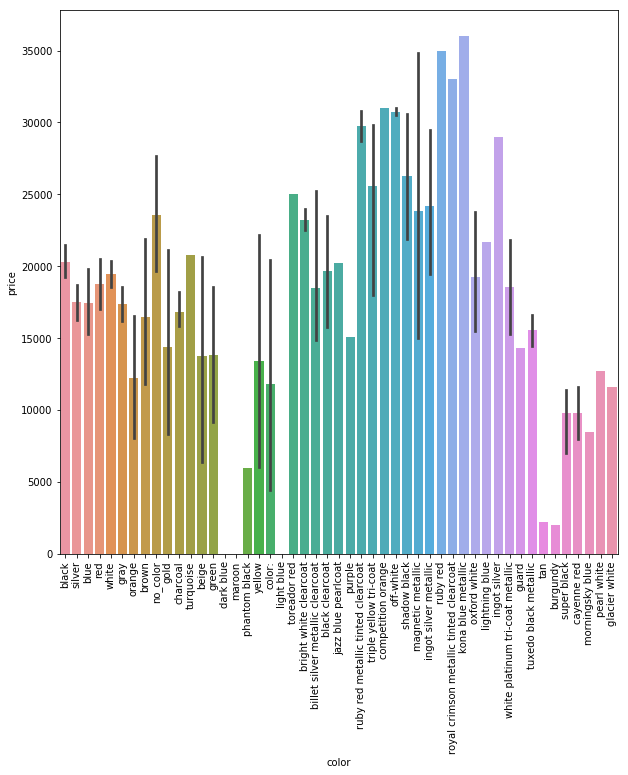

In [62]:
plt.figure(figsize=[10,10])
plt.tight_layout()
sns.barplot(x=df['color'],  y = df['price'] )
plt.xticks(rotation=90)
plt.show()

This plot lists the colors of each car and the prices associated with the color. It looks like there arekona blue metallic as the most expensive at around $35,000. Ruby red is the next expensive at and colors like tan, burgundy, and super black are not that expensive.(We can also see which cars are that color)

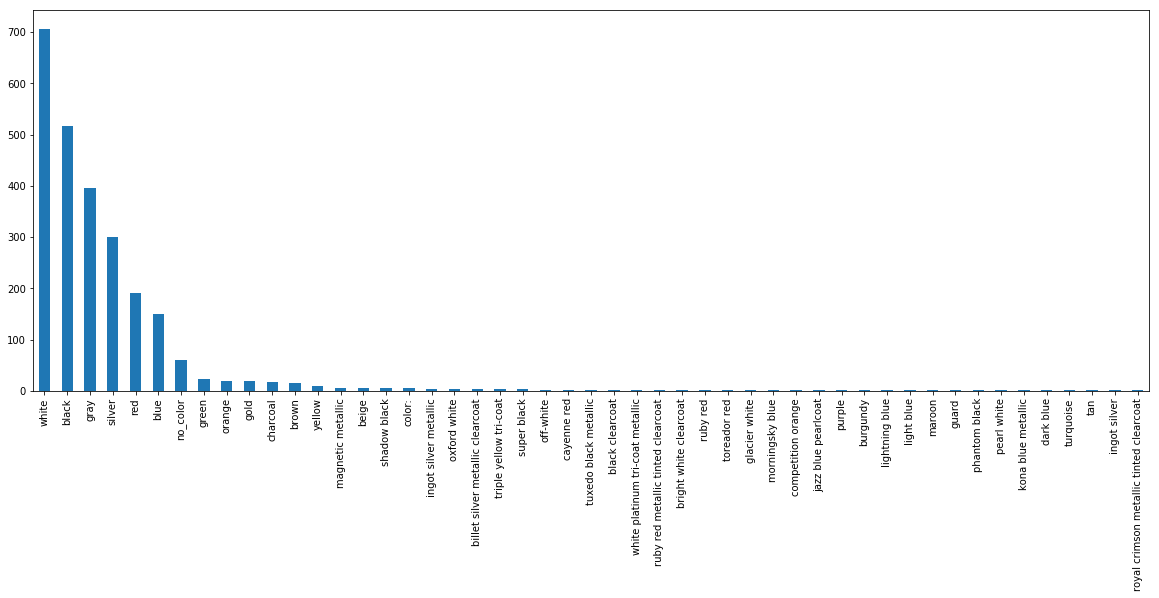

In [63]:


plt.figure(figsize=[20,7])

df['color'].value_counts().plot(kind="bar")

plt.show()





The color with the most counts in this data set is white, black and grey.  
These are outliers.  
Other colors have less than 100. 

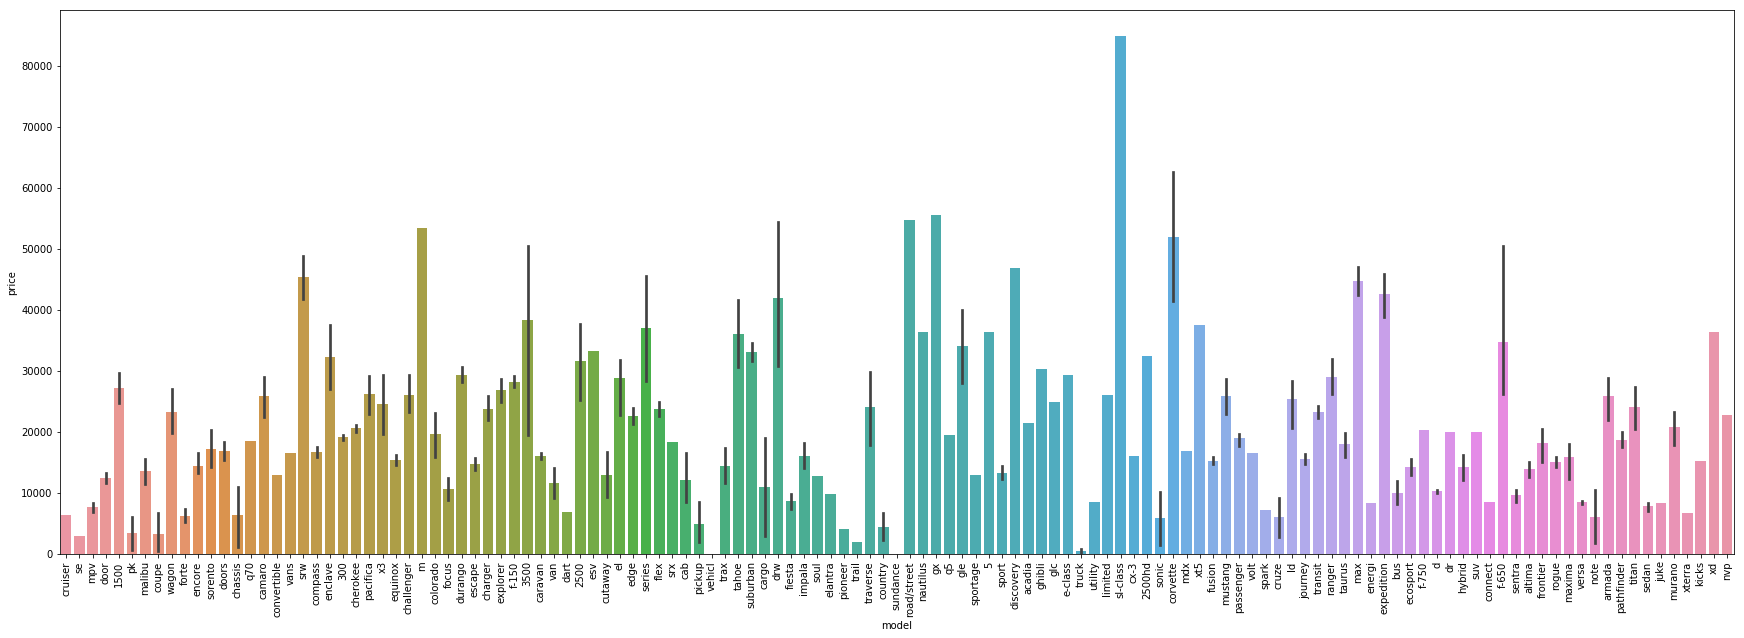

In [64]:
plt.figure(figsize=[30,10])
plt.tight_layout()
sns.barplot(x=df['model'],  y = df['price'])
plt.xticks(rotation=90)
plt.show()

HELP! so the max price here is 80k but the max price above this (barplot) was around 35k...

In [65]:
#df['Price'] = df['Price'].astype(int)
#we will now convert our newly labeled columns into integers since they are still objects. 
data[['brand','model', 'state', 'title_status', 'color', 'country']] = data[['brand','model', 'state', 'title_status', 'color', 'country']].astype(int)
data.dtypes

price                int64
brand                int32
model                int32
year                 int64
title_status         int32
mileage              int64
color                int32
vin                 object
lot                  int64
state                int32
country              int32
condition           object
condition_number     int64
dtype: object

In [66]:
data.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,condition_number
0,6300,27,25,2008,0,274117,2,jtezu11f88k007763,159348797,24,1,10 days left,14400
1,2899,8,92,2011,0,190552,39,2fmdk3gc4bbb02217,166951262,35,1,6 days left,8640
2,5350,7,75,2018,0,39590,39,3c4pdcgg5jt346413,167655728,7,1,2 days left,2880
3,25000,8,32,2014,0,64146,4,1ftfw1et4efc23745,167753855,39,1,22 hours left,1320
4,27700,5,0,2018,0,6654,34,3gcpcrec2jg473991,167763266,6,1,22 hours left,1320


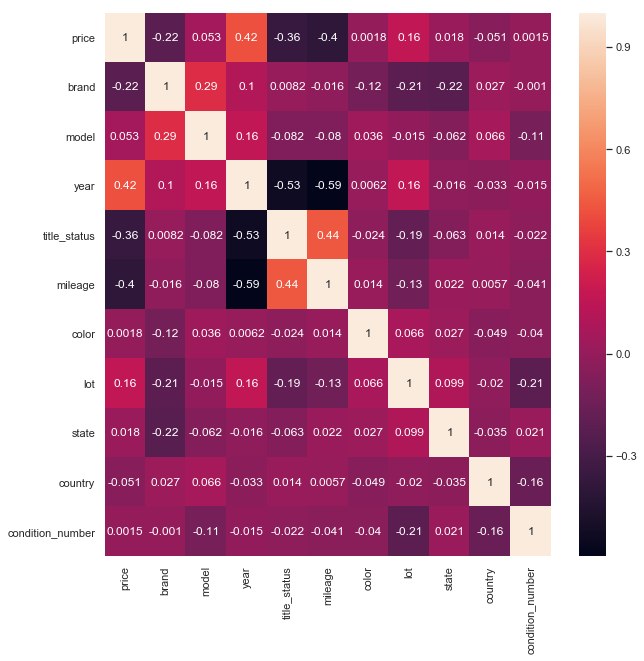

In [199]:
plt.figure(figsize=[10,10])
sns.heatmap(data.corr(),annot=True)
plt.show()

Negative correlation between price and brand (-0.22).  
Positive correlation between price and model (0.053), price and color (0.0018), lot (0.16), state (0.018). 
Negative correlation between price and title_status (-0.36) and mileage (-0.4).   

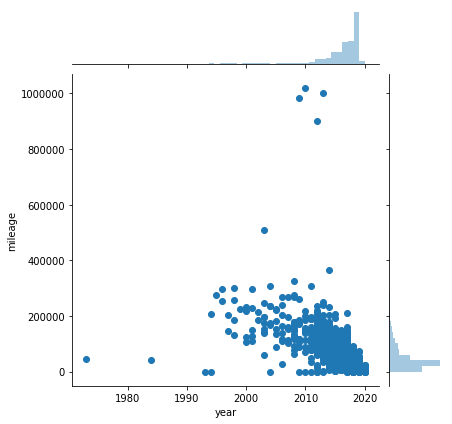

In [68]:
sns.jointplot('year', 'mileage', data=df)

Comparing mileage and year will show a graph heavily skewed to the left. As year increases, mileage decreases. 

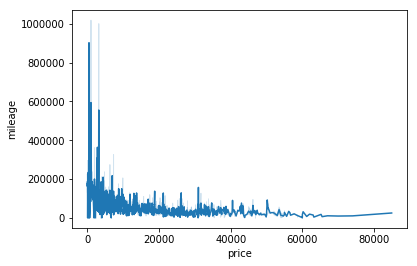

In [69]:
#create a lineplot for price
sns.lineplot(x='price', y='mileage', data = data)
plt.show()

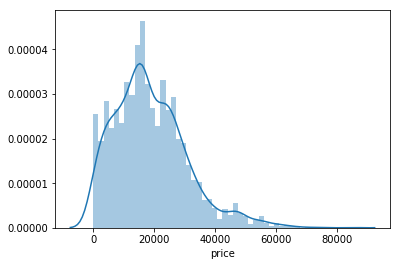

In [70]:
sns.distplot((data['price']),bins=50)
plt.show()

This supports the negative relationship between mileage and price. Vehicles with higher mileage have generally lower prices. 

## Linear Regression Model

In [174]:
#getting all the numerical values. Setting our x to all numerical values except price, the variable we are guessing. 
X = data.drop(['price','vin','condition' ], axis=1)
y = data['price']


In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [177]:
# print the intercept
print(lin.intercept_)

-1622790.3741574825


In [178]:
coeff_df = pd.DataFrame(lin.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
brand,-540.707394
model,18.954025
year,778.596325
title_status,-7050.765742
mileage,-0.041843
color,-30.115426
lot,0.000534
state,-30.711316
country,-9763.637474
condition_number,-0.046333


In [179]:
# The coefficients, i also dont know what this means
print('Coefficients: \n', lin.coef_)

Coefficients: 
 [-5.40707394e+02  1.89540248e+01  7.78596325e+02 -7.05076574e+03
 -4.18431652e-02 -3.01154257e+01  5.33628173e-04 -3.07113164e+01
 -9.76363747e+03 -4.63334744e-02]


Interpretation: A 1 unit increase in brand is associated with a decrease of 539 dollars.  
1 unit increase in model is associated with a $ 17. 99 increase in price.

## Model predictions

In [180]:
predictions= lin.predict(X_test)

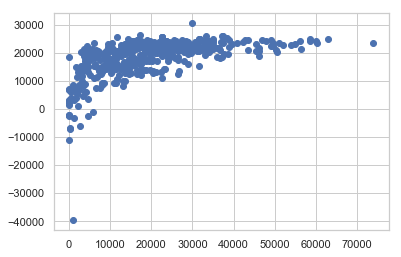

In [181]:
plt.scatter(y_test,predictions) 
#figure out how to differentiate y test vs predictions 
plt.show()

In [182]:
print (y_test, predictions)

2319    11390
1865    27900
902      2500
2240    10900
1285    23600
56      20000
1681    33400
802      8900
812     14500
903     28700
332      6270
1837    21200
2400    10300
1444    14700
2029    19700
1871    25000
786     14800
1530    14500
485     11200
2471    18800
134     25900
1538    29500
1352    35100
1922    32500
1279    23500
246     16500
1547    22400
789     16500
259     13270
422      5000
        ...  
1422     4000
2129    30000
342      6680
1070    18300
1732    35000
829     19000
1450    49000
299     10330
764     22500
1615     1750
1911    17900
1612    10000
2178    13600
2373    15000
1934    19888
220      4130
2466    12100
2465    13900
707      3000
497     26000
1486    37000
1014    16700
1000    33000
84      24000
1037     7600
2054    17150
1860    29000
1862    51000
1151    25300
461      5800
Name: price, Length: 500, dtype: int64 [  9105.99034054  23598.97716338   6570.54424398  15681.97397717
  24238.7643916   17808.4469495   22276.82

In [183]:
#This is a scatter plot drafting our y test against our predictions. This graph shows an imperfectly positive correlation, meaning that our predictions were pretty close to the actual y test. 

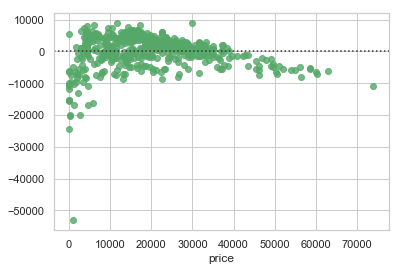

In [184]:
#residual plot
sns.set(style = "whitegrid")
sns.residplot(x= y_test, y = predictions, color = "g")
plt.show()

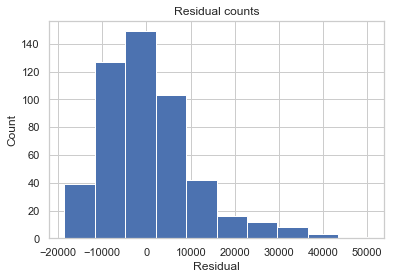

In [189]:

residual = y_test - predictions 
plt.hist(residual) 
plt.title('Residual counts') 
plt.xlabel('Residual') 
plt.ylabel('Count') 
plt.show()

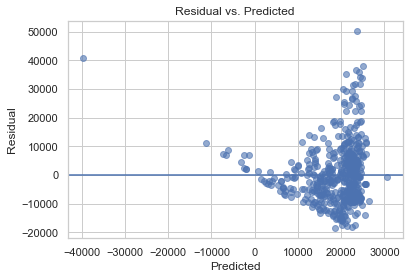

In [186]:
plt.scatter(predictions, residual, alpha=0.6 ) 
plt.xlabel('Predicted') 
plt.ylabel('Residual') 
plt.axhline(y=0) 
plt.title('Residual vs. Predicted') 
plt.show() #needs to have same shape above and below line

In [191]:
X_test.head()

,brand,model,year,title_status,mileage,color,lot,state,country,condition_number
2319,24,33,2015,0,37953,40,167654210,26,1,15840
1865,8,49,2019,0,28922,15,167801390,6,1,2880
902,7,117,2013,1,163260,34,167532547,35,1,900
2240,24,94,2019,0,31037,15,167457191,1,1,2880
1285,8,112,2019,0,13466,46,167735027,16,1,1260


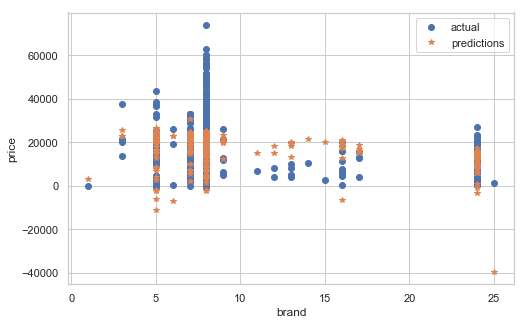

In [202]:
plt.figure(figsize=(8, 5))  
plt.plot(X_test['brand'], y_test, 'o', label="actual") 
plt.plot(X_test['brand'], predictions,  '*', label="predictions") 
plt.xlabel('brand') 
plt.ylabel('price') 
#plt.xticks([0,1,2,3,4,5,6],['Moday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']) 
plt.legend() 
plt.show()
#make columns for brand encoding, brand labeling, to get the names
#many outliers, redo your prediction, create a new x test and y test where you remove outliers.

In [203]:
from sklearn.model_selection import cross_val_score  
print('\nCross Val for linear regr:') 
print(cross_val_score(lin, X, y, cv=5)) 
print('\nCross Validation Mean Score: ')
print(cross_val_score(lin, X, y, cv=5).mean())


Cross Val for linear regr:
[0.01997444 0.1783156  0.12642325 0.25064583 0.30724512]

Cross Validation Mean Score: 
0.1765208485219833


In [89]:
predictions.min()

-39722.551357435994

In [90]:

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7751.570182644689
MSE: 110935616.67263989
RMSE: 10532.59781215631


## removing outliers and trying again 


In [149]:
datad = data.drop(['vin', 'condition'], axis=1)
datad.shape

(2499, 11)

In [206]:
print(datad < (Q1 - 1.5 * IQR)) |(datad > (Q3 + 1.5 * IQR).head())

      price  brand  model   year  title_status  mileage  color    lot  state  \
0     False  False  False   True         False    False  False   True  False   
1     False  False  False   True         False    False  False   True  False   
2     False  False  False  False         False    False  False  False  False   
3     False  False  False  False         False    False  False  False  False   
4     False   True  False  False         False    False  False  False  False   
5     False  False  False  False         False    False  False  False  False   
6     False   True  False   True         False    False  False  False  False   
7     False  False  False  False         False    False  False  False  False   
8     False   True  False  False         False    False  False  False  False   
9     False  False  False  False         False    False  False  False  False   
10    False  False  False   True         False    False  False  False  False   
11    False  False  False  False        

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [151]:
#GET iqr 
Q1 = datad.quantile(0.25)
Q3 = datad.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price                15355.5
brand                    1.0
model                   40.0
year                     3.0
title_status             0.0
mileage              42006.0
color                   42.0
lot                 154441.0
state                   23.0
country                  0.0
condition_number      1620.0
dtype: float64


In [152]:
out = datad[~((datad< (Q1 - 1.5 * IQR)) |(datad > (Q3 + 1.5 * IQR))).any(axis=1)]
out.shape

(1242, 11)

In [153]:
#getting all the numerical values. Setting our x to all numerical values except price, the variable we are guessing. 
Xo = out.drop(['price'], axis=1)
yo = out['price']


In [155]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xo, yo, test_size=0.2, random_state=42)

In [156]:
lin2 = LinearRegression()
lin2.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [157]:
# print the intercept
print(lin2.intercept_)

-4623739.188386763


In [158]:
coeff_out = pd.DataFrame(lin2.coef_,X.columns,columns=['Coefficient'])
coeff_out

,Coefficient
brand,2.670274e+03
model,8.140239e+00
year,1.014165e+03
title_status,5.570655e-12
mileage,-1.090192e-01
color,-2.045070e+01
lot,1.540185e-02
state,-7.750787e+01
country,0.000000e+00
condition_number,3.087273e-01


In [137]:

print('Coefficients: \n', lin2.coef_)

Coefficients: 
 [ 2.67027441e+03  8.14023854e+00  1.01416542e+03  5.57065505e-12
 -1.09019188e-01 -2.04507022e+01  1.54018514e-02 -7.75078663e+01
  0.00000000e+00  3.08727307e-01]


In [159]:
out_predictions= lin2.predict(X_test)

In [197]:

print('MAE:', metrics.mean_absolute_error(y_test1, out_predictions))
print('MSE:', metrics.mean_squared_error(y_test1, out_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, out_predictions)))

MAE: 6621.594461259597
MSE: 68737649.78127035
RMSE: 8290.817196228027


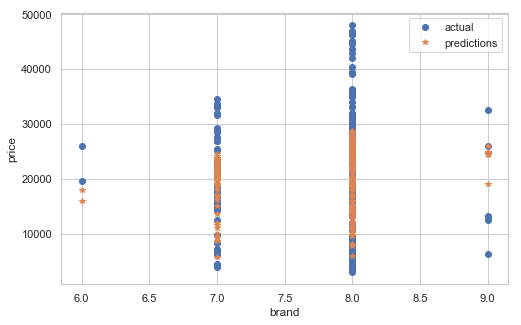

In [198]:
plt.figure(figsize=(8, 5))  
plt.plot(X_test1['brand'], y_test1, 'o', label="actual") 
plt.plot(X_test1['brand'], out_predictions,  '*', label="predictions") 
plt.xlabel('brand') 
plt.ylabel('price') 
#plt.xticks([0,1,2,3,4,5,6],['Moday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']) 
plt.legend() 
plt.show()
#make columns for brand encoding, brand labeling, to get the names
#many outliers, redo your prediction, create a new x test and y test where you remove outliers.

In [204]:
#print (y_test, out_predictions)

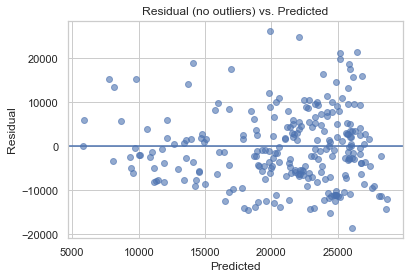

In [195]:
plt.scatter(out_predictions, residualo, alpha=0.6 ) 
plt.xlabel('Predicted') 
plt.ylabel('Residual') 
plt.axhline(y=0) 
plt.title('Residual (no outliers) vs. Predicted') 
plt.show() 

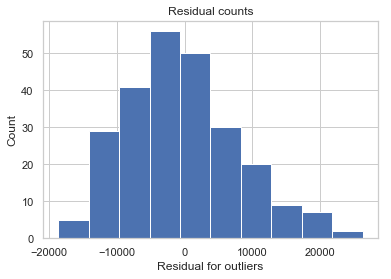

In [192]:

residualo = y_test1 - out_predictions 
plt.hist(residualo) 
plt.title('Residual counts') 
plt.xlabel('Residual for outliers') 
plt.ylabel('Count') 
plt.show()

In [193]:
#not so skewed to the right as before, more normal distribution

In [200]:
 print('\nCross Val for linear regr with no outliers:') 
print(cross_val_score(lin2, Xo, yo, cv=5)) 
print('\nCross Validation Mean Score: ')
print(cross_val_score(lin2, Xo, yo, cv=5))


Cross Val for linear regr with no outliers:
[-0.36194501  0.14229999  0.05075322  0.23331693  0.08582272]

Cross Validation Mean Score: 
0.030049570532141273


In [ ]:
# get R squared 